In [3]:
import cairo, argparse,copy,math,random, itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

# Recursive triangle

###### inspiration : https://tylerxhobbs.com/essays/2017/aesthetically-pleasing-triangle-subdivision

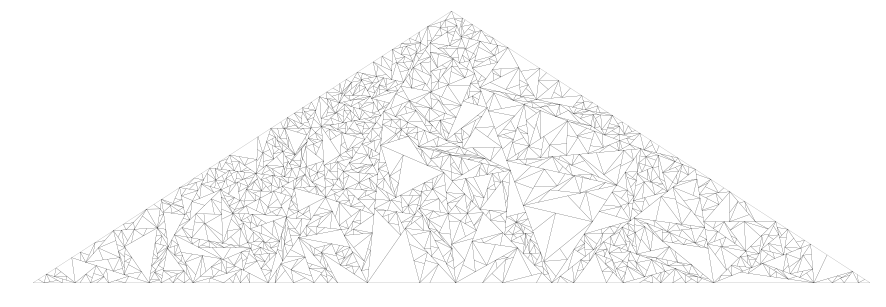

## Classes

In [4]:
class Triangle:
    """Define Triangle,its surface area, can be split in two along the largest side"""
    
    def __init__(self,triangle):
        #Define triangle as points or np.array
        
        self.triangle = np.array(triangle)
        self.area = np.abs(np.sum([(p1[0]*(p2[1]-p3[1]))/2 for p1,p2,p3 in zip(self.triangle,np.roll(self.triangle,1,axis=0),np.roll(self.triangle,2,axis=0))]))
    
    def split(self,ratio=0.5):
        #Find the longer edge of the triange (ptB,ptC) and split at point ptD it according to the ratio 
        
        ptA,ptB,ptC = max(((i,j,k,dist(j,k)) for i,j,k in itertools.permutations(self.triangle,3)), key=lambda x:x[3])[0:3]
        ptD = (((1-ratio)*ptB[0]+ratio*ptC[0]),((1-ratio)*ptB[1]+ratio*ptC[1]))
        return Triangle([ptB,ptD,ptA]),Triangle([ptC,ptD,ptA])
  

In [23]:
class regularPolygon:
    """Define a regular polygon, can be tesselated in triangles by two methods"""
    
    def __init__(self,origin,radius,nbSides):
        #Create a regular polygon
         
        origin = np.array(origin)
        self.origin = origin
        self.radius = radius
        self.nbSides = nbSides
        self.polygon = origin + radius*np.array([(np.sin(2*n*np.pi/nbSides),np.cos(2*n*np.pi/nbSides)) for n in range(nbSides)])
    
    
    def apexToTriangle(polygon):
        #Join by 3 the apexes of the polygon
        
        return np.array([polygon[2*n:2*n+3] for n in range((len(polygon)-1)//2)])
    
        
    def apexTessellation(self):
        #return triangles by linking the apex two by two
        #create the tesselation array (length nbSides polygon - 2) of all the triangles in the polygon
        
        tesselation = np.empty((self.nbSides-2,3,2))
        d = 0
        step = int(2**d)
        nbTri = 0
        while (len(list(self.polygon[::step])+[self.polygon[0]])//2>1):
            depthPolygon = list(self.polygon[::step])+[self.polygon[0]]
            newTessel = regularPolygon.apexToTriangle(depthPolygon)
            tesselation[nbTri:nbTri+len(newTessel)] = newTessel
            nbTri += len(newTessel)
            d += 1
            step = int(2**d)
        return tesselation  
                
    def randomPointTessellation(self):
        #define a random point in the polygon and create triangles with the apexes continuo
        
        randomPoint = self.origin+np.random.choice([-1,1],2)*np.random.rand(2)*self.radius/2
        tessellation = np.array([[randomPoint,p0,p1] for p0,p1 in zip(self.polygon,np.roll(self.polygon,1,axis=0))])
        return tessellation

## Main methods

In [6]:
def dist(pt1,pt2):
    #Distance between 2 points
    
    return np.sqrt((pt1[0]-pt2[0])**2+(pt1[1]-pt2[1])**2)

In [12]:
def recursion(listTriangles,depth=1,minArea=0):
    """Create two lists of triangles :  those split at this level (newTriangles) 
                                       those which won't be split anymore (oldTriangles)  
    Split according to the splitting rule : The higher the depth, the harder it will be to split the triangle
    The splitting can be stopped if the triangle area is too small (minArea)
    """
    
    newTriangles = [] #Triangles that will be split
    oldTriangles = [] #Triangles that will remain at this depth level
    for tri in listTriangles:
        
        odd = np.random.uniform()
        if ((depth <= 3)|((odd > 0.005) & (depth <= 5))|((odd > 0.01) & (depth <=7))|((odd > 0.05)& (depth <=9))|(odd > 0.10))&(tri.area>minArea):
            ratio = np.random.uniform(0.25,0.75)
            newTriangles = newTriangles + list(tri.split(ratio))
        else :
            oldTriangles = oldTriangles + list([tri])
        
    return newTriangles,oldTriangles

In [8]:
def iterationDepth(listTriangles,depth,minArea=10):
    """Iteration over the depth of details wanted
    Join the triangles not split during the recursion recursion in old
    new triangles is the result of the latest iteration
    finalTriangles join both final lists in one"""
    
    old = []
    for d in range(depth):
        newTriangles,oldTriangles = recursion(listTriangles,d,minArea)
        listTriangles = newTriangles
        old = old + list(oldTriangles)
    finalTriangles = listTriangles+old
    return finalTriangles
        

## Main

In [29]:
#parameters
##polygon
radius = 350
nbSides = 7
poly = regularPolygon([0,0],radius,nbSides) #initial polygon
##recursion
depth = 12
minArea = 25

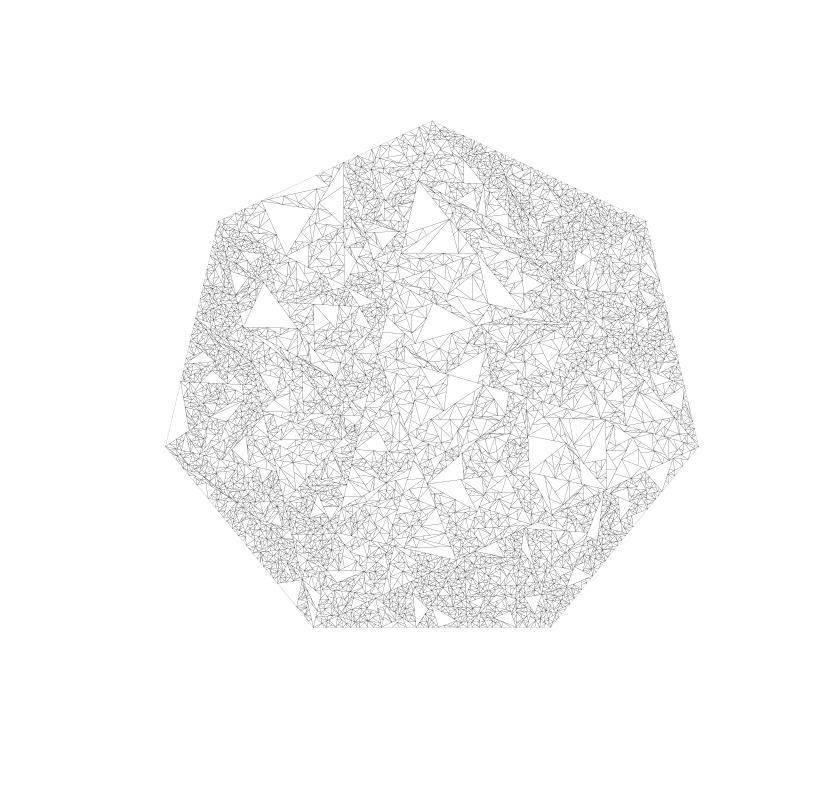

In [30]:
#tesselation from the apexes
listTriangle = [Triangle(tri) for tri in poly.apexTessellation()] 
triangles = iterationDepth(listTriangle,depth,minArea)
plt.figure(figsize=(14,14))

for t in triangles:
    tri = np.vstack([t.triangle,t.triangle[0]])

    plt.plot(tri[:,0],tri[:,1],'k-',lw=0.1)
plt.xlim([-500,500])
plt.ylim([-500,500])
plt.axis('off')
plt.show()

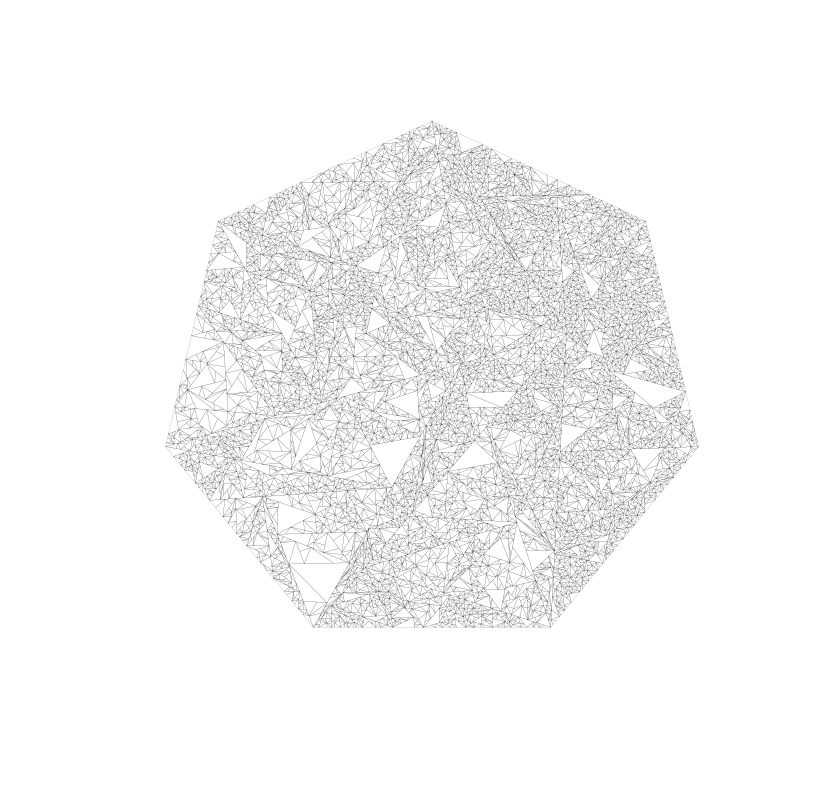

In [31]:
#tesselation with random point inside the polygon
listTriangle = [Triangle(tri) for tri in poly.randomPointTessellation()]
triangles = iterationDepth(listTriangle,depth,minArea)
plt.figure(figsize=(14,14))

for t in triangles:
    tri = np.vstack([t.triangle,t.triangle[0]])

    plt.plot(tri[:,0],tri[:,1],'k-',lw=0.1)
plt.xlim([-500,500])
plt.ylim([-500,500])
plt.axis('off')
plt.show()